In [9]:
import psycopg2
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "52.17.250.0",
    port = "5432",
    database = "dap_project")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    #dbCursor.execute('CREATE DATABASE dap_project;')
    #print("Database created sucessfully in postgres")
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
sql='''select * from movies;
'''
movies = pd.read_sql(sql, dbConnection)
df_movies = pd.DataFrame(movies)
print(df_movies)

        id      genre         production_company        production_country  \
0        3      Drama  Villealfa Filmproductions                   Finland   
1     9991     Comedy                  SKA Films            United Kingdom   
2       11  Adventure                  Lucasfilm  United States of America   
3       12  Animation                      Pixar  United States of America   
4       14      Drama        Jinks/Cohen Company  United States of America   
...    ...        ...                        ...                       ...   
1079  9966    Mystery                Screen Gems  United States of America   
1080  9968     Comedy                Rising Star                    Canada   
1081  9972     Action           TriStar Pictures  United States of America   
1082  9986     Comedy                  Paramount                   Germany   
1083  9988     Comedy   Broken Lizard Industries  United States of America   

     release_date  runtime languages                title  vote

In [61]:
sql='''select vote_count,title,genre from movies where vote_count>=16000 order by vote_count;'''
#dbCursor.execute(sql)
#data= dbCursor.fetchall()
#print(data)
movies = pd.read_sql(sql, dbConnection)
most_v_movies = pd.DataFrame(movies)
print(most_v_movies)

   vote_count                                             title      genre
0       16431          Harry Potter and the Philosopher s Stone  Adventure
1       16596  The Lord of the Rings The Fellowship of the Ring  Adventure
2       16613                                           Titanic      Drama
3       16653                                        The Matrix     Action
4       17983                                          Iron Man     Action
5       18206                                      Pulp Fiction   Thriller
6       18836                                        Fight Club      Drama
7       21751                                   The Dark Knight      Drama


Text(0, 0.5, 'vote count per movie')

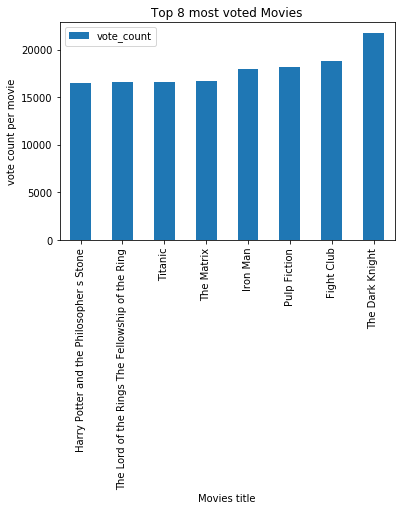

In [122]:
most_v_movies.plot(kind='bar',x='title',y='vote_count')
plt.xticks(rotation=90)
plt.title('Top 8 most voted Movies')
plt.xlabel('Movies title')
plt.ylabel('vote count per movie')


In [81]:
sql='''select count(id),genre from movies group by genre;'''
movies = pd.read_sql(sql, dbConnection)
grp_gnr_movies = pd.DataFrame(movies)
print(grp_gnr_movies)

    count            genre
0      86            Crime
1      13        Animation
2       5      Documentary
3      19          Romance
4       4          History
5      22          Mystery
6       6            Music
7      36          Fantasy
8       2         TV Movie
9      38  Science Fiction
10    106           Horror
11    221            Drama
12    175           Action
13     44         Thriller
14     24          Western
15    150           Comedy
16    125        Adventure
17      6              War
18      2           Family


In [64]:
sql='''select count(id),genre from movies group by genre;'''
movies = pd.read_sql(sql, dbConnection)
grp_gnr_movies = pd.DataFrame(movies)
print(grp_gnr_movies)

    count            genre
0      86            Crime
1      13        Animation
2       5      Documentary
3      19          Romance
4       4          History
5      22          Mystery
6       6            Music
7      36          Fantasy
8       2         TV Movie
9      38  Science Fiction
10    106           Horror
11    221            Drama
12    175           Action
13     44         Thriller
14     24          Western
15    150           Comedy
16    125        Adventure
17      6              War
18      2           Family


In [10]:
type(grp_gnr_movies)

pandas.core.frame.DataFrame

Text(0, 0.5, 'Total Movies per Genre')

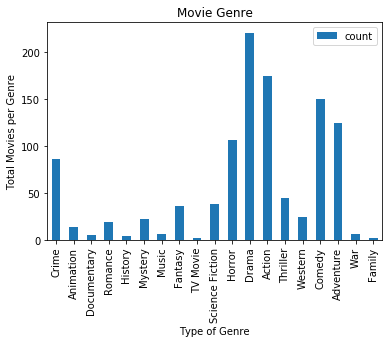

In [65]:
grp_gnr_movies.plot(kind='bar',x='genre',y='count')
plt.title('Movie Genre')
plt.xlabel('Type of Genre')
plt.ylabel('Total Movies per Genre')

In [67]:
sql='''select count(title),production_country from movies group by production_country;'''
movies = pd.read_sql(sql, dbConnection)
prd_cnty_movies = pd.DataFrame(movies)
print(prd_cnty_movies)

    count        production_country
0     703  United States of America
1       1               Switzerland
2       1                   Ecuador
3      12                     Italy
4      10               New Zealand
5       1                    Russia
6       3                     China
7       1                Luxembourg
8       4            Czech Republic
9       1                      Fiji
10      4                    Sweden
11    112            United Kingdom
12      4               Netherlands
13      1                    Uganda
14      1                    Brazil
15      1                   Austria
16     23                 Australia
17      7                   Ireland
18     57                   Germany
19     23                    Canada
20      1               South Korea
21      4                   Finland
22      1                  Bulgaria
23      1                 Argentina
24     11                     Spain
25      1                   Bahamas
26      1                   

In [68]:
sql='''select count(title),production_country from movies 
group by production_country 
order by count(title)desc limit 10;'''
movies = pd.read_sql(sql, dbConnection)
cntry_top_movies = pd.DataFrame(movies)
print(cntry_top_movies)

   count        production_country
0    703  United States of America
1    112            United Kingdom
2     57                   Germany
3     55                    France
4     23                 Australia
5     23                     Japan
6     23                    Canada
7     12                     Italy
8     11                     Spain
9     10               New Zealand


Text(0, 0.5, 'Total Movie count')

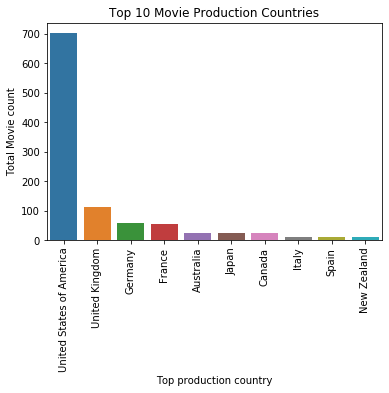

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.barplot(x='production_country',y='count',data=cntry_top_movies)
plt.xticks(rotation=90)
plt.title('Top 10 Movie Production Countries')
plt.xlabel('Top production country')
plt.ylabel('Total Movie count')


In [62]:
sql=''' select count(title),production_country from movies
group by production_country;'''
movies = pd.read_sql(sql, dbConnection)
line = pd.DataFrame(movies)
print(line)

    count        production_country
0     703  United States of America
1       1               Switzerland
2       1                   Ecuador
3      12                     Italy
4      10               New Zealand
5       1                    Russia
6       3                     China
7       1                Luxembourg
8       4            Czech Republic
9       1                      Fiji
10      4                    Sweden
11    112            United Kingdom
12      4               Netherlands
13      1                    Uganda
14      1                    Brazil
15      1                   Austria
16     23                 Australia
17      7                   Ireland
18     57                   Germany
19     23                    Canada
20      1               South Korea
21      4                   Finland
22      1                  Bulgaria
23      1                 Argentina
24     11                     Spain
25      1                   Bahamas
26      1                   

In [75]:
sql=''' select count(id),genre from movies group by genre;'''
movies = pd.read_sql(sql, dbConnection)
line = pd.DataFrame(movies)
print(line)

    count            genre
0      86            Crime
1      13        Animation
2       5      Documentary
3      19          Romance
4       4          History
5      22          Mystery
6       6            Music
7      36          Fantasy
8       2         TV Movie
9      38  Science Fiction
10    106           Horror
11    221            Drama
12    175           Action
13     44         Thriller
14     24          Western
15    150           Comedy
16    125        Adventure
17      6              War
18      2           Family


In [72]:
sql=''' select count(id),languages from movies group by languages order by count(id)desc
limit 5;'''
movies = pd.read_sql(sql, dbConnection)
line = pd.DataFrame(movies)
print(line)

   count languages
0    873   English
1     37   Español
2     37  Français
3     30   Deutsch
4     19       日本語


In [73]:
m=line['count']
print(m)

0    873
1     37
2     37
3     30
4     19
Name: count, dtype: int64


In [74]:
g=line['languages']

/Users/ganeshmore/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ganeshmore/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ganeshmore/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ganeshmore/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/ganeshmore/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/ganeshmore/anaconda3/lib/python3.7/site-packages/matplotl

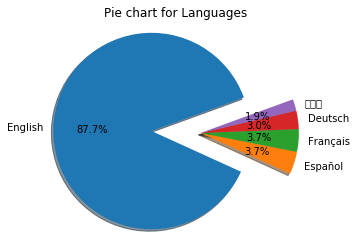

In [75]:
import matplotlib.pyplot as plt

labels = g
sizes = m
explode = (0.5, 0,0, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=20)
ax1.axis('equal') 
plt.title('Pie chart for Languages')
plt.show()

In [103]:
sql='''
select count(id),vote_average from movies group by vote_average;'''
movies = pd.read_sql(sql, dbConnection)
line1 = pd.DataFrame(movies)
print(line1)

    count  vote_average
0      49           7.3
1      46           6.7
2      51           7.2
3       6           5.1
4       1           4.5
5       7           5.3
6       2           4.7
7       4           4.6
8       1           2.9
9       2           8.5
10     43           6.4
11      1           3.1
12     41           7.6
13      1           8.6
14      1           4.1
15      2           4.8
16     38           6.2
17     14           8.3
18      1           4.0
19     18           5.8
20     28           8.0
21     22           5.7
22     19           5.4
23      1           3.3
24      5           5.2
25     36           7.7
26     20           5.6
27     40           7.1
28      5           4.9
29     42           7.0
30      3           4.3
31     31           5.9
32     47           7.5
33     21           8.2
34     32           6.1
35     31           7.9
36     15           8.4
37     45           6.6
38     20           8.1
39     33           7.8
40     41       

In [102]:
sql='''
select count(id),runtime from movies group by runtime;'''
movies = pd.read_sql(sql, dbConnection)
line2 = pd.DataFrame(movies)
print(line2)

     count  runtime
0       18      116
1        9       87
2        3       71
3        1      229
4        5       80
..     ...      ...
121      3      145
122      1      148
123     11      129
124     16      130
125      7      143

[126 rows x 2 columns]


In [107]:
sql=''' select count(title),production_country from movies
group by production_country order by count(title)desc limit 5;'''
movies = pd.read_sql(sql, dbConnection)
line5 = pd.DataFrame(movies)
print(line5)

   count        production_country
0    703  United States of America
1    112            United Kingdom
2     57                   Germany
3     55                    France
4     23                 Australia


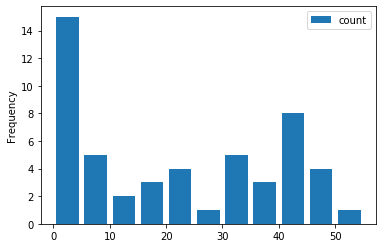

In [109]:
line1[['count']].plot(kind='hist',bins=[0,5,10,15,20,25,30,35,40,45,50,55],rwidth=0.8)


In [48]:
sql='''select TO_CHAR(release_date,'YYYY') as "Release Year", count(*) from movies 
group by "Release Year";'''
movies = pd.read_sql(sql, dbConnection)
line10 = pd.DataFrame(movies)
print(line10)


   Release Year  count
0          1968      8
1          2010      1
2          1979     17
3          1942      4
4          1997     33
..          ...    ...
87         1955      9
88         2005     43
89         1902      1
90         1925      1
91         1964     10

[92 rows x 2 columns]


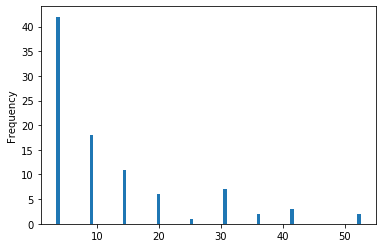

In [49]:
line10['count'].plot(kind='hist',rwidth=0.1)


In [4]:
%matplotlib inline
sns.barplot(x='Release Year',y='count',width=1,data=line10)
plt.xticks(rotation=90)


NameError: name 'line10' is not defined

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91]),
 <a list of 92 Text xticklabel objects>)

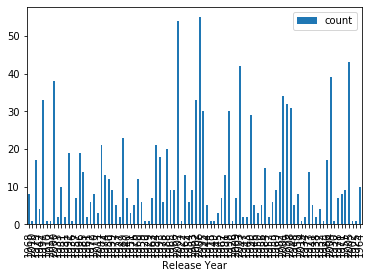

In [14]:
line10.plot(kind='bar',x='Release Year',y='count')
plt.xticks(rotation=90)

In [3]:
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot



sql='''

 

select TO_CHAR(release_date,'YYYY') as "Release Year", count(*) from movies 
group by "Release Year";
'''
data = pd.read_sql(sql, dbConnection)
count_year = data.sort_values(by=['count'],ascending=False).head(29)
year = list(count_year['Release Year'])
movie_count=list(count_year['count'])

 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clrs = ['red' if (x < max(movie_count)) else 'blue' for x in movie_count ]
plt.title('Movies by Year')
plt.xlabel('Release year')
plt.ylabel('Total no. of Movies per year')
ax.bar(year,movie_count, width=1, edgecolor='black', color = clrs)
plt.xticks(rotation=70)

plt.show()
#fig.savefig('output.png', dpi=300, bbox_inches='tight')

NameError: name 'dbConnection' is not defined

   Release Year         avg
50         1915  193.000000
90         1925  151.000000
34         1963  148.857143
64         1956  139.400000
6          2012  136.000000
31         1959  134.500000
84         1930  133.000000
19         2011  133.000000
30         1960  128.083333
62         1946  125.200000
45         1983  124.333333
25         1927  123.500000
44         1954  123.000000
21         1974  122.615385
4          1997  119.454545
0          1968  118.875000
37         1975  118.833333
39         1965  118.111111
40         1966  117.777778
65         1984  117.466667
57         2009  117.428571
58         2003  117.238095
2          1979  117.117647
48         1995  116.666667
69         1982  116.357143
36         1993  116.222222
85         1978  116.000000
1          2010  116.000000
88         2005  115.627907


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

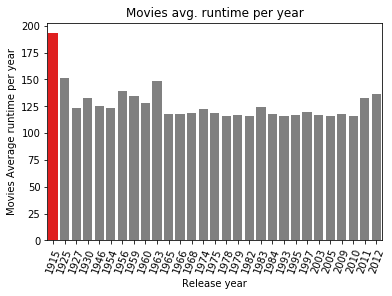

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

 

sql='''

 

select TO_CHAR(release_date,'YYYY') as "Release Year", AVG(runtime) from movies group by "Release Year";
'''
data = pd.read_sql(sql, dbConnection)
count_year = data.sort_values(by=['avg'],ascending=False).head(29)
year = list(count_year['Release Year'])
movie_count=list(count_year['avg'])
clrs = ['grey' if (x < max(movie_count)) else 'red' for x in movie_count ]
sns.barplot(x=year, y=movie_count, palette=clrs) # color=clrs)
plt.title('Movies avg. runtime per year')
plt.xlabel('Release year')
plt.ylabel('Movies Average runtime per year')
 

print(count_year)

 

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(year,movie_count, width=0.7, edgecolor='black', color = 'green')
plt.xticks(rotation=70)
# plt.show()
#fig.savefig('output.png', dpi=300, bbox_inches='tight')

In [23]:
sql='''select count(languages),production_company from movies
group by production_company 
order by count(languages)desc limit 7;'''
movies = pd.read_sql(sql, dbConnection)
line11 = pd.DataFrame(movies)
print(line11)

   count     production_company
0     71              Paramount
1     59     Universal Pictures
2     41      Columbia Pictures
3     32         United Artists
4     22  Warner Bros. Pictures
5     18    Touchstone Pictures
6     17    Metro-Goldwyn-Mayer


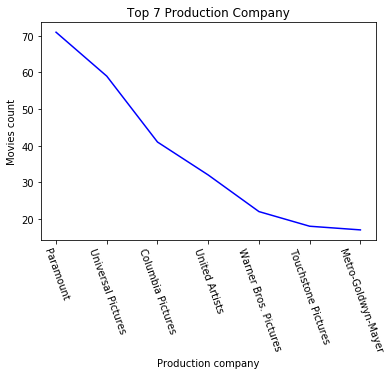

In [24]:
plt.plot(line11['production_company'], line11['count'], color='blue')
plt.xlabel('Production company')
plt.ylabel('Movies count')
plt.title('Top 7 Production Company')
plt.xticks(rotation=-70)
plt.show()